# Exercises Sheet 4 Search - Genetic Algorithms

([20], [0.00012826919555664062])
([130], [0.0010762214660644531])
([3757032], [72.37737560272217])


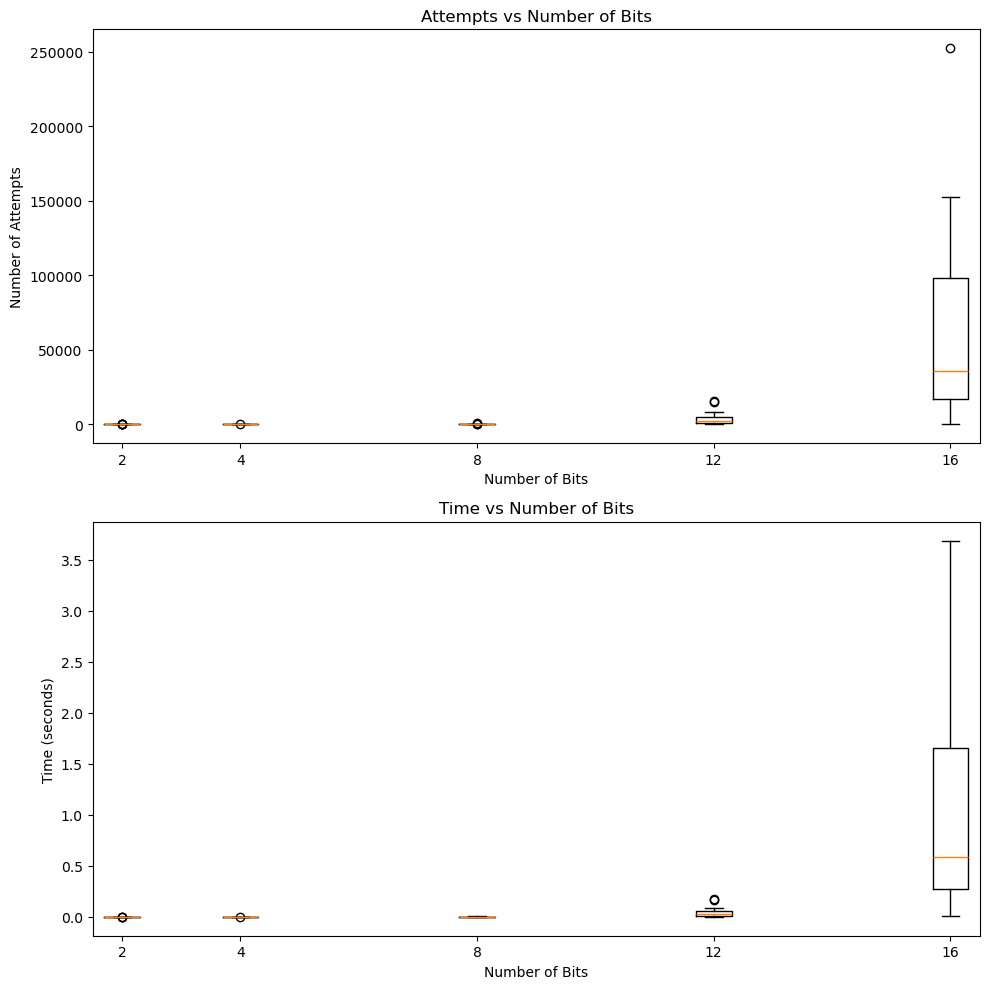

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

# Normaliza o fitness
class Game:
    def __init__(self, str_size):
        if str_size <= 0:
            raise ValueError("str_size must be a positive integer")
        self.str_size = str_size
        self.target_pattern = ''.join(random.choice('01') for _ in range(str_size))

    def change_game_pattern(self):
        self.target_pattern = ''.join(random.choice('01') for _ in range(self.str_size))

    def generate_random_bit_pattern(self):
        return ''.join(random.choice('01') for _ in range(self.str_size))

    def is_correct_pattern(self, pattern):
        return pattern == self.target_pattern

def measure_performance(str_size, num_trials=30, seeds=None):
    if seeds is None:
        seeds = [i for i in range(num_trials)]

    attempts = []
    times = []

    for seed in seeds:
        random.seed(seed)
        game = Game(str_size)
        start_time = time.time()
        attempt_count = 0

        while True:
            pattern = game.generate_random_bit_pattern()
            attempt_count += 1
            if game.is_correct_pattern(pattern):
                break

        end_time = time.time()
        elapsed_time = end_time - start_time
        attempts.append(attempt_count)
        times.append(elapsed_time)

    return attempts, times

def plot_performance(str_sizes, num_trials=30, seeds=None):
    if seeds is None:
        seeds = [i for i in range(num_trials)]

    attempts_data = []
    times_data = []

    for str_size in str_sizes:
        attempts, times = measure_performance(str_size, num_trials, seeds)
        attempts_data.append(attempts)
        times_data.append(times)

    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # Plot attempts
    axs[0].boxplot(attempts_data, positions=str_sizes, widths=0.6)
    axs[0].set_xlabel('Number of Bits')
    axs[0].set_ylabel('Number of Attempts')
    axs[0].set_title('Attempts vs Number of Bits')
    axs[0].set_xticks(str_sizes)

    # Plot times
    axs[1].boxplot(times_data, positions=str_sizes, widths=0.6)
    axs[1].set_xlabel('Number of Bits')
    axs[1].set_ylabel('Time (seconds)')
    axs[1].set_title('Time vs Number of Bits')
    axs[1].set_xticks(str_sizes)

    plt.tight_layout()
    plt.show()

print(measure_performance(str_size=4, num_trials=1))

print(measure_performance(str_size=6, num_trials=1))

print(measure_performance(str_size=20, num_trials=1))

# Define the pattern sizes to test
str_sizes = [2, 4, 8, 12, 16]
# Plot the performance
plot_performance(str_sizes)
